# Setup system

In [ ]:
# %load_ext autoreload
# %autoreload 2
# các lệnh sau vào ô đầu tiên của notebook để tự động nạp lại các module khi có thay đổi

%cd /kaggle/working
!git clone https://github.com/Harito97/HaritoProduction.git
# %cd /Data/Projects/HaritoProduction
%cd /kaggle/working/HaritoProduction
!git pull
%matplotlib inline
%pip install -r backend/requirements.txt

In [2]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     print(dirname)
!ls /kaggle/input

cell-cluster-detection	cellclassifier	h97_ann  thyroidcancer-ver1


In [ ]:
from backend.app.models.ThyroidCancerClassificationModel import ThyroidCancerClassificationModel
import numpy as np
import torch

model1_path = '/kaggle/input/cell-cluster-detection/pytorch/train300epoches/1/best.pt'
model2_path = '/kaggle/input/cellclassifier/pytorch/train100epoches/1/best_h97_retrainEfficientNet_B2_B5_B6_dataver3_model.pt'
model3_path = '/kaggle/input/h97_ann/pytorch/input_is_output_of_model2/1/model_best.pt'

model = ThyroidCancerClassificationModel(model1_path=model1_path, model2_path=model2_path, model3_path=model3_path)

In [ ]:
import wandb

wandb.login()

# Info in test dataset

In [ ]:
data_dir = "/kaggle/input/thyroidcancer-ver1/dataver1/ver1/test"
test_acc, test_f1, cm, cr, cm_path, cr_path, roc_auc_path = model.test_with_each_part(data_dir, "test")

Test accuracy: 0.8758620689655172
Test F1 score: 0.8741315098087272


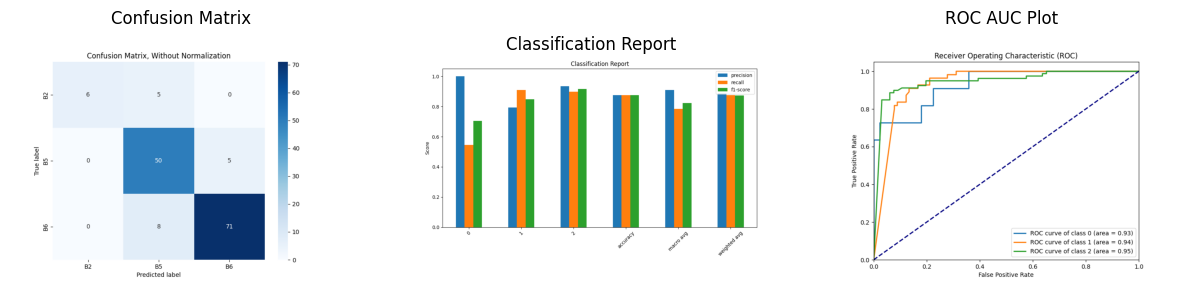

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(f"Test accuracy: {test_acc}")
print(f"Test F1 score: {test_f1}")
# Hiển thị các ảnh
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(mpimg.imread(cm_path))
axs[0].set_title('Confusion Matrix')
axs[0].axis('off')

axs[1].imshow(mpimg.imread(cr_path))
axs[1].set_title('Classification Report')        
axs[1].axis('off')

axs[2].imshow(mpimg.imread(roc_auc_path))
axs[2].set_title('ROC AUC Plot')
axs[2].axis('off')

plt.show()

# Info in train dataset

In [ ]:
data_dir = "/kaggle/input/thyroidcancer-ver1/dataver1/ver1/train"
test_acc, test_f1, cm, cr, cm_path, cr_path, roc_auc_path = model.test_with_each_part(data_dir, "train")

Test accuracy: 0.971304347826087
Test F1 score: 0.9714476207097813
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.96      0.98        82
           1       0.94      0.99      0.96       437
           2       0.99      0.96      0.98       631

    accuracy                           0.97      1150
   macro avg       0.98      0.97      0.97      1150
weighted avg       0.97      0.97      0.97      1150



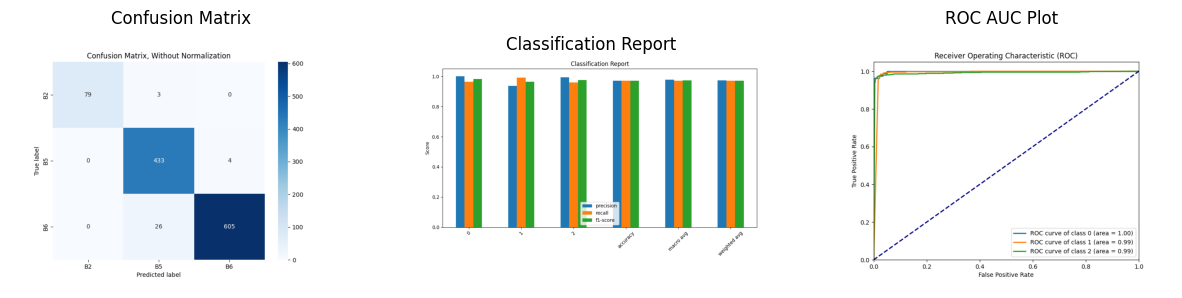

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(f"Test accuracy: {test_acc}")
print(f"Test F1 score: {test_f1}")
print(f"Classification Report: {cr}")
# Hiển thị các ảnh
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(mpimg.imread(cm_path))
axs[0].set_title('Confusion Matrix')
axs[0].axis('off')

axs[1].imshow(mpimg.imread(cr_path))
axs[1].set_title('Classification Report')        
axs[1].axis('off')

axs[2].imshow(mpimg.imread(roc_auc_path))
axs[2].set_title('ROC AUC Plot')
axs[2].axis('off')

plt.show()

# Info in valid dataset

In [ ]:
data_dir = "/kaggle/input/thyroidcancer-ver1/dataver1/ver1/valid"
test_acc, test_f1, cm, cr, cm_path, cr_path, roc_auc_path = model.test_with_each_part(data_dir, "valid")

Test accuracy: 0.9
Test F1 score: 0.900302621355253


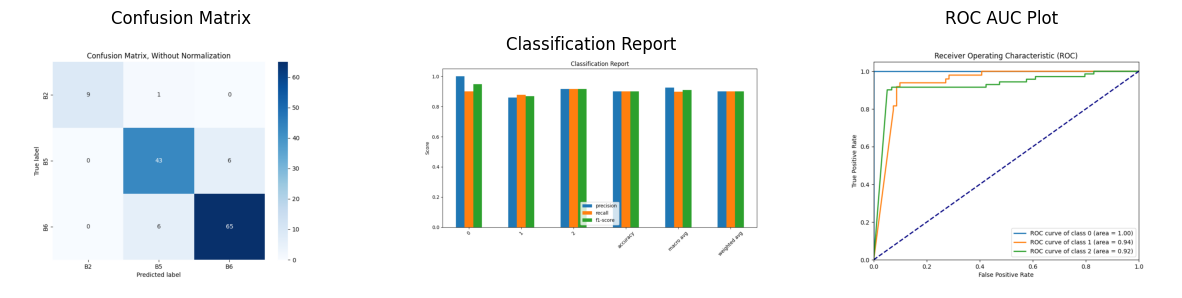

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(f"Test accuracy: {test_acc}")
print(f"Test F1 score: {test_f1}")
# Hiển thị các ảnh
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(mpimg.imread(cm_path))
axs[0].set_title('Confusion Matrix')
axs[0].axis('off')

axs[1].imshow(mpimg.imread(cr_path))
axs[1].set_title('Classification Report')        
axs[1].axis('off')

axs[2].imshow(mpimg.imread(roc_auc_path))
axs[2].set_title('ROC AUC Plot')
axs[2].axis('off')

plt.show()

---

# Report

Sau khi train qua khoảng 35 model (bao gồm cách thay đổi kiến trúc model hoặc cách biến đổi tiền xử lý dữ liệu) em đã chọn ra 5 model có thể đưa ra kết luận quan trọng

## Về dữ liệu: 

Từ bộ dữ liệu gốc của thầy em phân chia train/valid/test theo tỷ lệ 80:10:10.

## Về model tốt nhất hiện tại 

(em tạm ký hiệu H97), trên tập test (10% số lượng ảnh của bộ dữ liệu ban đầu) đang thu được kết quả là: 

- 87,6% độ chính xác accuracy; 
- bên cạnh đó f1-score (đánh giá sự chính xác của 3 nhãn phân loại do bài toán có nhãn B2 mất cân bằng lớn so với các nhãn B5 B6) đạt được 87,41% trung bình cho 3 nhãn;
- đánh giá bằng đường ROC AUC cũng đạt kết quả khả quan khi 3 nhãn có diện tích dưới dường cong lần lượt là: B2 - 0.93, B5 - 0.94, B6 - 0.95;

## Về các kết luận từ 7 biểu đồ em chắt lọc:

- biểu đồ đầu tiên là của model H97 trên tập valid (10% lượng ảnh gốc ban đầu) (đạt 90% accuracy)
- biểu đồ tiếp theo là của H97 trên tập train (80% lượng ảnh gốc ban đầu) (đạt 97% accuracy)
- biểu đồ thứ 3 là của H97 trên tập test (10% lượng ảnh gốc ban đầu) (đạt 87,6% accuracy)

$\to$ 3 biểu đồ này cho thấy kết quả của model tốt nhất em thu được hiện tại (model H97)

- biểu đồ thứ 4 là của model ViT, hiện ViT đang bày tỏ sự ấn tượng  trong các bài toán phân loại ảnh. Tuy nhiên sau nhiều lần thử nghiệm em chưa thấy ViT đạt kết quả tốt do dữ liệu huấn luyện để ViT có được kết quả tốt yêu cầu rất lớn. Mặt khác do phần cứng hạn chế nên em chỉ mới train ViT được 10 epoch
- biểu đồ thứ 5 là của model phân loại nhị phân 2 nhãn B5 B6, có thể thấy việc cố phân loại 2 nhãn B5 B6 riêng ra không tốt hơn việc phân loại 3 nhãn B2, B5, B6
- biểu đồ thứ 6 là của model phân loại nhị phân 2 nhãn B2 (lành tính), B5B6 (ác tính). Phân loại nhị phân như này đạt kết quả rất ấn tượng.  Tuy nhiên các bài báo cũ trước đó đã làm qua việc phân loại nhị phân lành tính, ác tính này rồi
- biểu đồ thứ 7 là phân loại 3 nhãn B2 B5 B6 - em đã re train lại toàn bộ mạng do dữ liệu tế bào học là quá khác biệt so với các ảnh trong tập image net dùng cho các model pretrained thường thấy. Do vậy em từ bỏ hướng dùng pretrained và quyết định train lại toàn bộ mạng


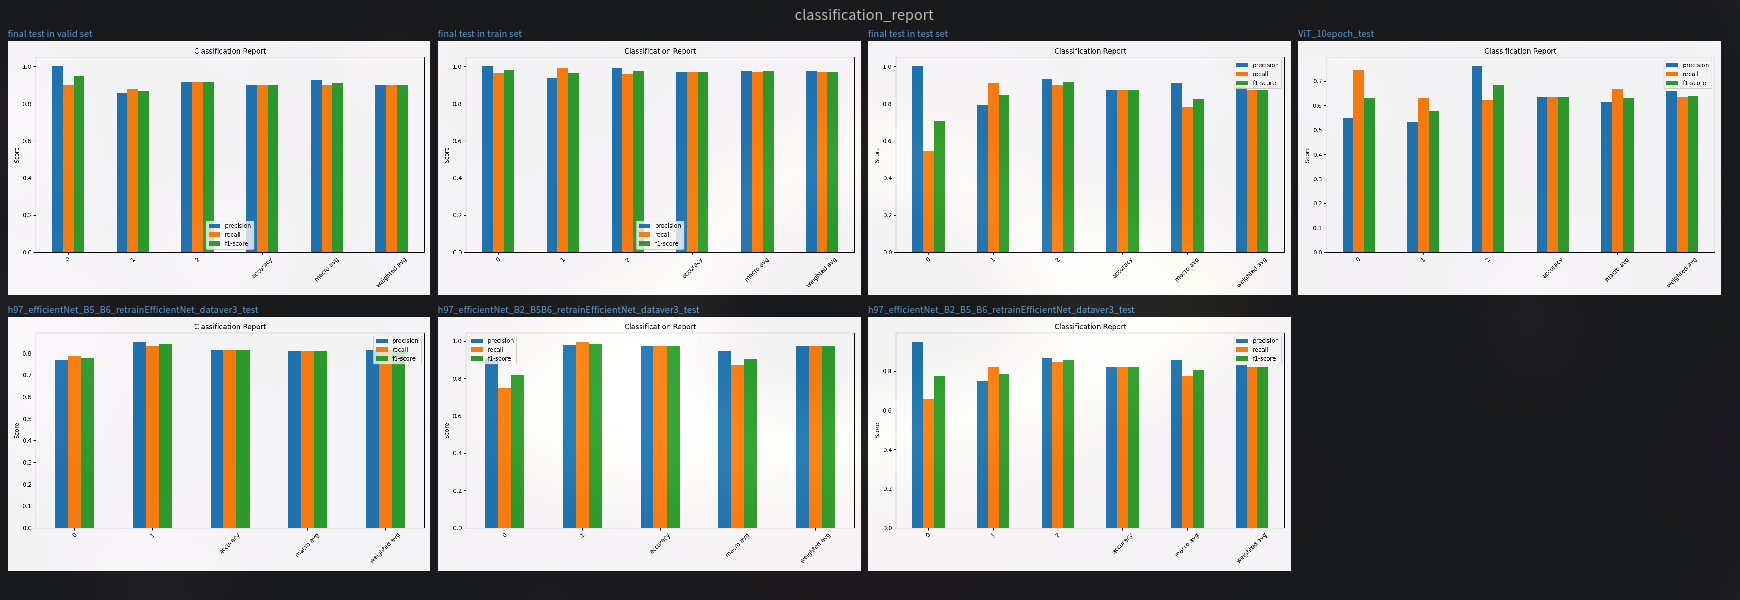

# Về cách em triển khai model H97:

- model H97 bao gồm 3 module (module 1 là model xác định vùng quan tâm của ảnh), module 2 là model CNN nhận đầu vào là các ảnh cắt tổng hợp từ module 1, module 3 là 1 model ANN nhận input là vector 54 chiều (thu được và duỗi ra từ module 2) và đầu ra là 3 (xác suất thuộc về 3 nhãn B2, B5, B6)
- sau khi chuyển toàn bộ source code từ Tensorflow sang PyTorch em đã quyết định xây dựng lại module 1 theo hướng đơn giản hơn.  Cụ thể thay vì xác định từng tế bào riêng lẻ rồi dùng giải thuật phâncụm, cắt theo mật độ; em đã nhận thấy sự đồng nhất trong việc gán nhãn các cụm tế bào và đã gán nhãn lại dữ liệu cũng như xây dựng lại để xác định vùng cụm tế bào. Từ đó giảm khối lượng tính toán,mà hiệu quả không thay đổi
- về module 2 của model H97, bản chất nó là mạng EfficientNetB0 (em thấy mạng này nhẹ và dễ train lại toàn bộ mạng hơn so với các kiến trúc khác). Mạng trích suất đặc trưng sẽ qua các lớp dense (9,73,3). Bằng cách cho 12 ảnh (cắt theo lưới từ ảnh gốc), 5 ảnh cắt thu được từ các cụm quan trọng của ảnh, 1 ảnh gốc (resize về 224x224). Như vậy đầu ra của module 2 là vector 18*3=54 chiều.
- về module 3 của model H97, đây là 1 ANN đơn giản để tạo quan hệ phi tuyến của input với output, trong đó trọng số từ các đặc trưng của 5 ảnh cắt vùng quan trọng được đặt cao hơn 13 ảnh còn lại (gấp khoảng 5 lần), 12 ảnh cắt theo lưới có trọng số cao hơn ảnh gốc resize 224x224
